<a href="https://colab.research.google.com/github/pedrohortencio/digit-recognizer-kaggle/blob/master/Kannada_vs_Classic_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np                  
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

sns.set_theme()

##Downloading and Preparing the Data

In [3]:
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c Kannada-MNIST
#!kaggle competitions download -c digit-recognizer

kaggle.json
 72% 7.00M/9.71M [00:03<00:01, 2.21MB/s]
100% 9.71M/9.71M [00:03<00:00, 3.37MB/s]
  0% 0.00/818k [00:00<?, ?B/s]
100% 818k/818k [00:00<00:00, 54.6MB/s]
  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 62.7MB/s]
  0% 0.00/33.1k [00:00<?, ?B/s]
100% 33.1k/33.1k [00:00<00:00, 42.5MB/s]


In [8]:
# Creating train and test dataframes from the dataset
df_train = pd.read_csv('/content/train.csv.zip', compression='zip', 
                        header=0, sep=',', quotechar='"')
df_test = pd.read_csv('/content/test.csv.zip', compression='zip', 
                       header=0, sep=',', quotechar='"')

In [8]:
df_train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.drop(columns='id', inplace=True)

In [6]:
print(df_train.shape)
print(df_test.shape)

(60000, 785)
(5000, 784)


In [10]:
y = df_train['label'].to_numpy()   #creates a ndarray containing the training labels

df_train = df_train.drop('label', axis=1) # drops tha label column from the training dataframe

# Creating NumPy arrays for both test and train images
X = df_train.to_numpy()
X_test = df_test.to_numpy()

# Splitting the data
(X_train, X_validation,
 y_train, y_validation) = train_test_split(X, y, random_state=0)

(X_test, X_validation,
  y_test, y_validation) = train_test_split(X_validation, y_validation, test_size=0.5, random_state=0)

In [11]:
# As there are multiple models, I'll work on only a part of the dataset, to speed up the training
print("\nTrain dataset")
print(X_train.shape)
print(y_train.shape)
print("\nValidation dataset")
print(X_validation.shape)
print(y_validation.shape)
print("\nTest dataset (subset of Train dataset, with labels)")
print(X_test.shape)
print(y_test.shape)


Train dataset
(45000, 784)
(45000,)

Validation dataset
(7500, 784)
(7500,)

Test dataset (subset of Train dataset, with labels)
(7500, 784)
(7500,)


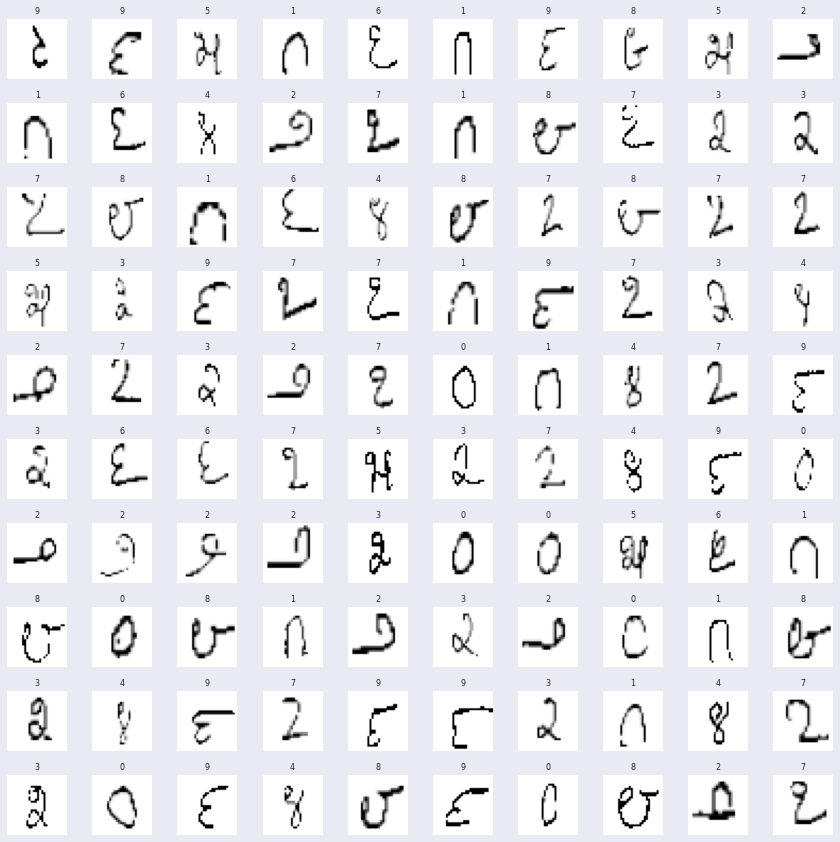

In [12]:
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
fig.patch.set_facecolor('#eaeaf2')

axes = axes.ravel()
n_training = len(X_train) 

for i in np.arange(0, W_grid * L_grid):

    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index].reshape(28,28), cmap='Greys')
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [13]:
#Train dataset
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_train = X_train.astype('float32') / 255

#Validation dataset
X_validation = X_validation.reshape(len(X_validation), 28, 28, 1)
X_validation = X_validation.astype('float32') / 255

#Test dataset
X_test = X_test.reshape(len(X_test), 28, 28, 1)
X_test = X_test.astype('float32') / 255

##Training the models

In [14]:
def create_model():
    model = tf.keras.models.Sequential([
            
            tf.keras.layers.Conv2D(32, (3,3), activation=keras.layers.LeakyReLU(), input_shape=(28, 28, 1)), 
            tf.keras.layers.MaxPooling2D(2, 2),

            tf.keras.layers.Conv2D(64, (3,3), activation=keras.layers.LeakyReLU()),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            tf.keras.layers.Conv2D(128, (3,3), activation=keras.layers.LeakyReLU()),
            
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(.5),

            tf.keras.layers.Dense(128, activation=keras.layers.LeakyReLU(), kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1.5e-5, l2=1e-4)),
            tf.keras.layers.Dropout(0.4),
            tf.keras.layers.Dense(64, activation=keras.layers.LeakyReLU(), kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(10, activation='softmax')    
    ])
    return model

###Kannada MNIST

In [15]:
model_kannada = create_model()
model_kannada.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_kannada.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1152)              0

In [16]:
loss_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [17]:
history_kannada = model_kannada.fit(X_train, y_train, epochs=100, batch_size = 500, 
                            callbacks=loss_callback, validation_data=(X_validation, y_validation))

Epoch 1/100
90/90 [==============================] - 9s 32ms/step - loss: 1.1973 - accuracy: 0.6402 - val_loss: 0.2018 - val_accuracy: 0.9741
Epoch 2/100
90/90 [==============================] - 2s 25ms/step - loss: 0.2416 - accuracy: 0.9630 - val_loss: 0.1574 - val_accuracy: 0.9853
Epoch 3/100
90/90 [==============================] - 2s 25ms/step - loss: 0.1947 - accuracy: 0.9747 - val_loss: 0.1392 - val_accuracy: 0.9880
Epoch 4/100
90/90 [==============================] - 2s 25ms/step - loss: 0.1616 - accuracy: 0.9812 - val_loss: 0.1259 - val_accuracy: 0.9903
Epoch 5/100
90/90 [==============================] - 2s 25ms/step - loss: 0.1433 - accuracy: 0.9853 - val_loss: 0.1134 - val_accuracy: 0.9920
Epoch 6/100
90/90 [==============================] - 2s 25ms/step - loss: 0.1286 - accuracy: 0.9878 - val_loss: 0.1094 - val_accuracy: 0.9904
Epoch 7/100
90/90 [==============================] - 2s 25ms/step - loss: 0.1242 - accuracy: 0.9868 - val_loss: 0.0973 - val_accuracy: 0.9919
Epoch 

In [19]:
kannada_stats = model_kannada.evaluate(X_test, y_test)

235/235 [==============================] - 1s 4ms/step - loss: 0.0478 - accuracy: 0.9956


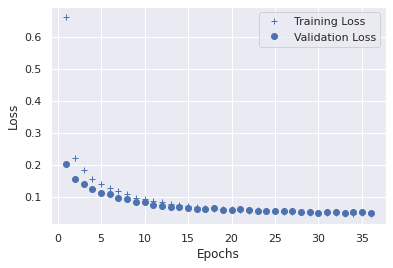

In [20]:
epochs = range(1, len(history_kannada.history['loss'])+1)
training_loss = history_kannada.history['loss']
validation_loss = history_kannada.history['val_loss']


# b+ is for "blue cross"
plt.plot(epochs, training_loss, 'b+', label='Training Loss')
# "bo" is for "blue dot"
plt.plot(epochs, validation_loss, 'bo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

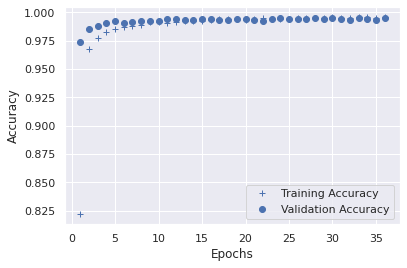

In [21]:
epochs = range(1, len(history_kannada.history['loss'])+1)
training_acc = history_kannada.history['accuracy']
validation_acc = history_kannada.history['val_accuracy']


# b+ is for "blue cross"
plt.plot(epochs, training_acc, 'b+', label='Training Accuracy')
# "bo" is for "blue dot"
plt.plot(epochs, validation_acc, 'bo', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

###MNIST

In [23]:
!kaggle competitions download -c digit-recognizer --force

  0% 0.00/9.16M [00:00<?, ?B/s]
100% 9.16M/9.16M [00:00<00:00, 84.7MB/s]
  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 99.7MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 65.9MB/s]


In [24]:
df_train = pd.read_csv('/content/train.csv.zip', compression='zip', 
                        header=0, sep=',', quotechar='"')
df_test = pd.read_csv('/content/test.csv.zip', compression='zip', 
                       header=0, sep=',', quotechar='"')

print(df_train.shape)
print(df_test.shape)

(42000, 785)
(28000, 784)


In [25]:
y = df_train['label'].to_numpy()   #creates a ndarray containing the training labels

df_train = df_train.drop('label', axis=1) # drops tha label column from the training dataframe

# Creating NumPy arrays for both test and train images
X = df_train.to_numpy()
X_test = df_test.to_numpy()

# Splitting the data
(X_train, X_validation,
 y_train, y_validation) = train_test_split(X, y, random_state=0)

(X_test, X_validation,
  y_test, y_validation) = train_test_split(X_validation, y_validation, test_size=0.5, random_state=0)

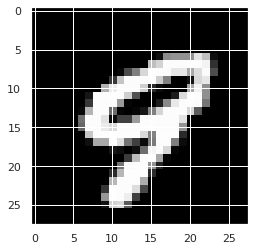

In [26]:
plt.imshow(X_train[9238].reshape(28,28), cmap='gray') 

In [30]:
#Train dataset
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_train = X_train.astype('float32') / 255

#Validation dataset
X_validation = X_validation.reshape(len(X_validation), 28, 28, 1)
X_validation = X_validation.astype('float32') / 255

#Test dataset
X_test = X_test.reshape(len(X_test), 28, 28, 1)
X_test = X_test.astype('float32') / 255

In [31]:
model_mnist = create_model()
model_mnist.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_mnist.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 1152)             

In [32]:
loss_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [33]:
history_mnist = model_mnist.fit(X_train, y_train, epochs=100, batch_size = 500, 
                            callbacks=loss_callback, validation_data=(X_validation, y_validation))

Epoch 1/100
63/63 [==============================] - 3s 32ms/step - loss: 2.3393 - accuracy: 0.2101 - val_loss: 1.6217 - val_accuracy: 0.7400
Epoch 2/100
63/63 [==============================] - 2s 26ms/step - loss: 1.5477 - accuracy: 0.5550 - val_loss: 0.7335 - val_accuracy: 0.8520
Epoch 3/100
63/63 [==============================] - 2s 26ms/step - loss: 0.9222 - accuracy: 0.7419 - val_loss: 0.5199 - val_accuracy: 0.8882
Epoch 4/100
63/63 [==============================] - 2s 25ms/step - loss: 0.7147 - accuracy: 0.8109 - val_loss: 0.4309 - val_accuracy: 0.9084
Epoch 5/100
63/63 [==============================] - 2s 25ms/step - loss: 0.5886 - accuracy: 0.8544 - val_loss: 0.3693 - val_accuracy: 0.9238
Epoch 6/100
63/63 [==============================] - 2s 26ms/step - loss: 0.4970 - accuracy: 0.8830 - val_loss: 0.3308 - val_accuracy: 0.9347
Epoch 7/100
63/63 [==============================] - 2s 25ms/step - loss: 0.4522 - accuracy: 0.8966 - val_loss: 0.3050 - val_accuracy: 0.9429
Epoch 

In [34]:
mnist_stats = model_mnist.evaluate(X_test, y_test)

165/165 [==============================] - 1s 3ms/step - loss: 0.1013 - accuracy: 0.9897


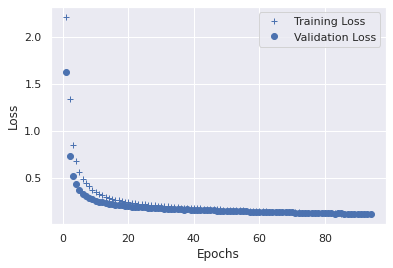

In [35]:
epochs = range(1, len(history_mnist.history['loss'])+1)
training_loss = history_mnist.history['loss']
validation_loss = history_mnist.history['val_loss']


# b+ is for "blue cross"
plt.plot(epochs, training_loss, 'b+', label='Training Loss')
# "bo" is for "blue dot"
plt.plot(epochs, validation_loss, 'bo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

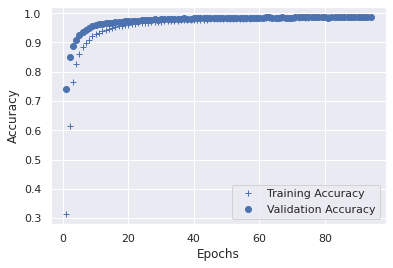

In [36]:
epochs = range(1, len(history_mnist.history['loss'])+1)
training_acc = history_mnist.history['accuracy']
validation_acc = history_mnist.history['val_accuracy']


# b+ is for "blue cross"
plt.plot(epochs, training_acc, 'b+', label='Training Accuracy')
# "bo" is for "blue dot"
plt.plot(epochs, validation_acc, 'bo', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

##Comparison

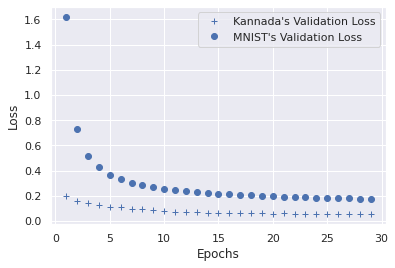

In [46]:
epochs = range(1, 30)
val_loss_kannada = history_kannada.history['val_loss']
val_loss_mnist = history_mnist.history['val_loss']


# b+ is for "blue cross"
plt.plot(epochs, val_loss_kannada[:29], 'b+', label="Kannada's Validation Loss")
# "bo" is for "blue dot"
plt.plot(epochs, val_loss_mnist[:29], 'bo', label="MNIST's Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("Validation-Loss-Comparison.png", bbox_inches='tight', dpi=300)
plt.show()

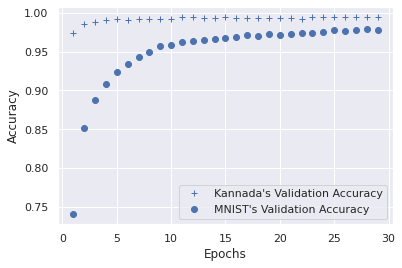

In [50]:
epochs = range(1, 30)
val_loss_kannada = history_kannada.history['val_accuracy']
val_loss_mnist = history_mnist.history['val_accuracy']


# b+ is for "blue cross"
plt.plot(epochs, val_loss_kannada[:29], 'b+', label="Kannada's Validation Accuracy")
# "bo" is for "blue dot"
plt.plot(epochs, val_loss_mnist[:29], 'bo', label="MNIST's Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig("Validation-Accuracy-Comparison.png", bbox_inches='tight', dpi=300)
plt.show()

In [63]:
dct={'Loss Test':[kannada_stats[0], mnist_stats[0]],
     'Acc Test': [kannada_stats[1], mnist_stats[1]]}

In [64]:
df = pd.DataFrame.from_dict(dct)
df

,Loss Test,Acc Test
0,0.047801,0.995600
1,0.101254,0.989714


In [67]:
df.rename(index={0:'Kannada', 1:'MNIST'}, inplace=True)

In [68]:
df

,Loss Test,Acc Test
Kannada,0.047801,0.995600
MNIST,0.101254,0.989714


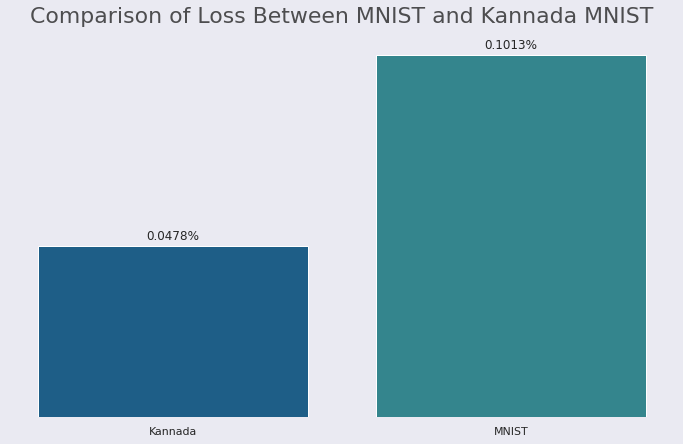

In [87]:
fig = plt.figure(figsize=(12,7))   # changes the size of the image
fig.patch.set_facecolor('#eaeaf2')

ax = plt.gca()

plt.box(False)
ax.grid(False)
ax.set_yticks([])

loss_bar = ax.bar(df.index, df['Loss Test'], color=sns.color_palette("crest_r", n_colors=3))

for r1 in loss_bar.patches:
    h1 = r1.get_height()

    ax.annotate('{:.4f}%'.format(h1),
                    xy=(r1.get_x() + r1.get_width() / 2, h1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.title('Comparison of Loss Between MNIST and Kannada MNIST',
          size=22, alpha=0.8, y=1.02)

# saves the plot
plt.savefig("Test-Loss-Comparison.png", bbox_inches='tight', dpi=300)
# displays the plot
plt.show();

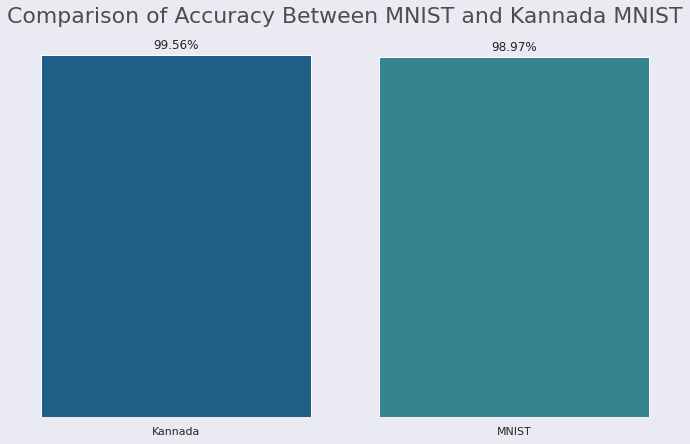

In [88]:
fig = plt.figure(figsize=(12,7))   # changes the size of the image
fig.patch.set_facecolor('#eaeaf2')

ax = plt.gca()

plt.box(False)
ax.grid(False)
ax.set_yticks([])

acc_bar = ax.bar(df.index, df['Acc Test'], color=sns.color_palette("crest_r", n_colors=3))

for r1 in acc_bar.patches:
    h1 = r1.get_height()
    percent = h1*100

    ax.annotate('{:.2f}%'.format(percent),
                    xy=(r1.get_x() + r1.get_width() / 2, h1),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.title('Comparison of Accuracy Between MNIST and Kannada MNIST',
          size=22, alpha=0.8, y=1.02)

# saves the plot
plt.savefig("Test-Accuracy-Comparison.png", bbox_inches='tight', dpi=300)
# displays the plot
plt.show();